In [68]:
import pandas as pd
import numpy as np
import os
import glob
from datetime import datetime
import matplotlib.pyplot as plt
import plotly.express as px
import dash
from dash.dash_table.Format import Group
from dash import Dash, html, dcc, callback, Output, Input
import plotly.graph_objs as go
import seaborn as sns

## Load dataset

In [3]:
file_path = '/Users/dantashashou/Downloads/Viz/Lastfm/*.csv'
file_list = glob.glob(file_path)
df = pd.DataFrame()
for file in file_list:
    columns = ['Artist', 'Album', 'Track', 'Date']
    listener = os.path.basename(file.split('.')[0])
    temp_df = pd.read_csv(file, names = columns)
    temp_df = temp_df.assign(Listener = listener)
    df = pd.concat([df, temp_df], ignore_index=True)
    print("Processing file:", file)

Processing file: /Users/dantashashou/Downloads/Viz/Lastfm/kamui-69.csv
Processing file: /Users/dantashashou/Downloads/Viz/Lastfm/codycollett.csv
Processing file: /Users/dantashashou/Downloads/Viz/Lastfm/Nforgione11.csv
Processing file: /Users/dantashashou/Downloads/Viz/Lastfm/tanguy2013.csv
Processing file: /Users/dantashashou/Downloads/Viz/Lastfm/Lourencoo.csv
Processing file: /Users/dantashashou/Downloads/Viz/Lastfm/HeyDottore.csv
Processing file: /Users/dantashashou/Downloads/Viz/Lastfm/xB1GY3EDx.csv
Processing file: /Users/dantashashou/Downloads/Viz/Lastfm/SilentDefender.csv
Processing file: /Users/dantashashou/Downloads/Viz/Lastfm/Maxxwi.csv
Processing file: /Users/dantashashou/Downloads/Viz/Lastfm/inmyprime.csv
Processing file: /Users/dantashashou/Downloads/Viz/Lastfm/AscendingNode.csv
Processing file: /Users/dantashashou/Downloads/Viz/Lastfm/crimetays.csv
Processing file: /Users/dantashashou/Downloads/Viz/Lastfm/Senneh.csv
Processing file: /Users/dantashashou/Downloads/Viz/Lastf

In [4]:
df.tail()

,Artist,Album,Track,Date,Listener
4931677,Arctic Monkeys,Whatever People Say I Am That's What I'm Not,A Certain Romance,04 Oct 2021 18:17,Lavark99
4931678,Tyler the Creator,IGOR,EARFQUAKE,04 Oct 2021 18:06,Lavark99
4931679,Kid Cudi,Man on the Moon III: The Chosen,Solo Dolo Pt. III,04 Oct 2021 17:59,Lavark99
4931680,Playboi Carti,Whole Lotta Red,Die4Guy,04 Oct 2021 17:55,Lavark99
4931681,Joji,BALLADS 1,TEST DRIVE,04 Oct 2021 17:53,Lavark99


In [5]:
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)

In [6]:
# print(df.info())
select = df[df['Artist'] == 'Jay Chou']
select.head()
# select = df[df['Album'] == 'Mayday']
# select.head()
# select = df[df['Track'] == 'Mayday']
# select.head()
# select = df[df['Listener'] == 'SilentDefender']
# select.sample(10)

,Artist,Album,Track,Date,Listener
135833,Jay Chou,周杰倫的床邊故事,Now You See Me,2021-08-20 17:50:00,SilentDefender
135849,Jay Chou,周杰倫的床邊故事,Now You See Me,2021-08-20 16:26:00,SilentDefender
2302279,Jay Chou,周杰倫的床邊故事,告白氣球,2020-05-08 18:44:00,Thibunn
2302451,Jay Chou,周杰倫的床邊故事,告白氣球,2020-05-02 16:42:00,Thibunn
2303029,Jay Chou,周杰倫的床邊故事,告白氣球,2020-04-21 15:49:00,Thibunn


In [42]:
unique_artists = df['Artist'].nunique()
print(unique_artists)
unique_albums= df['Album'].nunique()
print(unique_albums)
unique_tracks = df['Track'].nunique()
print(unique_tracks)
unique_listeners = df['Listener'].nunique()
print(unique_listeners)

86111
152282
326956
62


## Count most listened

In [7]:
#counts
artist_counts = df['Artist'].value_counts()
album_counts = df['Album'].value_counts()
track_counts = df['Track'].value_counts()
listener_counts = df['Listener'].value_counts()

# Most listened artist
most_listened_artist = artist_counts.idxmax()
most_listened_artist_count = artist_counts.max()

# Most listened album
most_listened_album = album_counts.idxmax()
most_listened_album_count = album_counts.max()

# Most listened track
most_listened_track = track_counts.idxmax()
most_listened_track_count = track_counts.max()

# Most listened listener
most_listened_listener = listener_counts.idxmax()
most_listened_listener_count = listener_counts.max()

print("Most listened artist is: {}, {}".format(most_listened_artist, most_listened_artist_count))
print("Most listened album is: {}, {}".format(most_listened_album, most_listened_album_count))
print("Most listened track is: {}, {}".format(most_listened_track, most_listened_track_count))
print("Most listened listener is: {}, {}".format(most_listened_listener, most_listened_listener_count))

Most listened artist is: Taylor Swift, 613171
Most listened album is: Stay Alive (Prod. SUGA of BTS), 185958
Most listened track is: Stay Alive (Prod. SUGA of BTS), 186251
Most listened listener is: d0ras, 284373


In [8]:
Rankartist = pd.DataFrame({'Artist': artist_counts.index, 'Count': artist_counts.values})
Rankartist.head(10)

,Artist,Count
0,Taylor Swift,613171
1,Drake,465401
2,Jung Kook,186614
3,BTS,176329
4,Charlie Puth,64596
5,Charlie Puth BTS Jung Kook,50215
6,Olivia Rodrigo,42121
7,Harry Styles,33521
8,Charlie Puth Jung Kook BTS,30786
9,Nightwish,28807


<AxesSubplot:xlabel='Artist'>

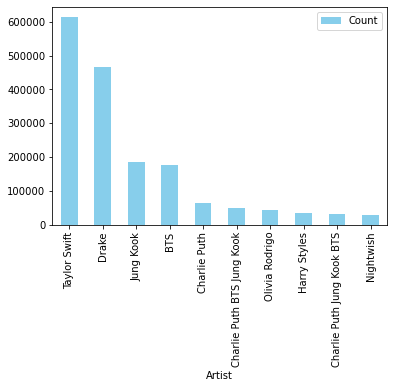

In [9]:
Rankartist10 = Rankartist.head(10)
Rankartist10.plot(kind='bar', x='Artist', y='Count', color='skyblue')

In [11]:
Rankalbum = pd.DataFrame({'Album': album_counts.index, 'Count': album_counts.values})
Rankalbum.head(10)

,Album,Count
0,Stay Alive (Prod. SUGA of BTS),185958
1,HONESTLY NEVERMIND,105553
2,Midnights,94187
3,Midnights (3am Edition),81348
4,Left and Right (Feat. Jung Kook of BTS),63803
5,Red (Taylor's Version),63433
6,Fearless (Taylor's Version),54657
7,MAP OF THE SOUL : 7,46551
8,Lover,46356
9,So Far Gone,45607


In [12]:
Ranktrack = pd.DataFrame({'Track': track_counts.index, 'Count': track_counts.values})
Ranktrack.head(10)

,Track,Count
0,Stay Alive (Prod. SUGA of BTS),186251
1,Intro,143707
2,Left and Right (Feat. Jung Kook of BTS),76755
3,Euphoria,56089
4,Left and Right (feat. Jung Kook of BTS),49673
5,My Time,45687
6,Meet Me At Midnight,35167
7,Begin,29877
8,A Message From Taylor,26152
9,Anti-Hero,20253


In [13]:
Ranklistener = pd.DataFrame({'Listener': listener_counts.index, 'Count': listener_counts.values})
Ranklistener.head(10)

,Listener,Count
0,d0ras,284373
1,czarrep13,274768
2,jon1wt,256921
3,Meljiee999,239867
4,Prj1,238287
5,Thibunn,212519
6,Hanhvunt2002,179253
7,Tardifice,171343
8,Kleber_Fp17,168200
9,Jes_Jungkook97,151353


## Count weekly most listened

In [14]:
#df.set_index('Date', inplace=True)

In [15]:
weekly_top_artist = df.groupby(df['Date'].dt.to_period('W'))['Artist'].agg(lambda x: x.value_counts().idxmax())
Rankartist_weekly = pd.DataFrame({'Artist': weekly_top_artist.values}, index=weekly_top_artist.index)
Rankartist_weekly.tail()

,Artist
Date,
2023-10-02/2023-10-08,Drake
2023-10-09/2023-10-15,Drake
2023-10-16/2023-10-22,Drake
2023-10-23/2023-10-29,Drake
2023-10-30/2023-11-05,Drake


In [16]:
weekly_top_album = df[df['Album'] != ''].groupby(df['Date'].dt.to_period('W'))['Track'].agg(lambda x: x.value_counts().idxmax())        
#weekly_top_album = weekly_top_album.reset_index(drop=True)
Rankalbum_weekly = pd.DataFrame({'Album': weekly_top_album.values}, index=weekly_top_album.index)
Rankalbum_weekly.head()

,Album
Date,
1969-12-29/1970-01-04,Waldschrein
2006-04-24/2006-04-30,The First Cut Is the Deepest
2006-05-08/2006-05-14,Alles aus Liebe
2006-05-15/2006-05-21,Listen to Your Heart
2006-05-22/2006-05-28,Unwritten


In [17]:
weekly_top_track = df.groupby(df['Date'].dt.to_period('W'))['Track'].agg(lambda x: x.value_counts().idxmax())
Ranktrack_weekly = pd.DataFrame({'Track': weekly_top_track.values}, index=weekly_top_track.index)
Ranktrack_weekly.head()

,Track
Date,
1969-12-29/1970-01-04,Waldschrein
2006-04-24/2006-04-30,The First Cut Is the Deepest
2006-05-08/2006-05-14,Alles aus Liebe
2006-05-15/2006-05-21,Listen to Your Heart
2006-05-22/2006-05-28,Unwritten


In [18]:
weekly_top_listener = df.groupby(df['Date'].dt.to_period('W'))['Listener'].agg(lambda x: x.value_counts().idxmax())
Ranklistener_weekly = pd.DataFrame({'Listener': weekly_top_listener.values}, index=weekly_top_listener.index)
Ranklistener_weekly.tail()

,Listener
Date,
2023-10-02/2023-10-08,d0ras
2023-10-09/2023-10-15,MrCoolDrake
2023-10-16/2023-10-22,MrCoolDrake
2023-10-23/2023-10-29,MrCoolDrake
2023-10-30/2023-11-05,d0ras


In [19]:
weekly_top10_artists = (
    df.assign(Week=df['Date'].dt.to_period('W')) 
    .loc[df['Artist'] != '']  
    .groupby(['Week', 'Artist'])
    .size()
    .reset_index(name='Count')
    .groupby('Week', group_keys=False)
    .apply(lambda x: x.nlargest(10, 'Count'))
    .reset_index(drop=True)
)
weekly_top10_artists.tail()

,Week,Artist,Count
8941,2023-10-30/2023-11-05,Mike,24
8942,2023-10-30/2023-11-05,Lana Del Rey,23
8943,2023-10-30/2023-11-05,Taylor Swift,23
8944,2023-10-30/2023-11-05,Duster,22
8945,2023-10-30/2023-11-05,Devon Hendryx,20


In [20]:
weekly_top10_albums = (
    df.assign(Week=df['Date'].dt.to_period('W')) 
    .loc[df['Album'] != '']  
    .groupby(['Week', 'Album'])
    .size()
    .reset_index(name='Count')
    .groupby('Week', group_keys=False)
    .apply(lambda x: x.nlargest(10, 'Count'))
    .reset_index(drop=True)
)
weekly_top10_albums.tail()

,Week,Album,Count
8838,2023-10-30/2023-11-05,Acquiesce,20
8839,2023-10-30/2023-11-05,1989 (Taylor's Version),18
8840,2023-10-30/2023-11-05,The Ghost~Pop Tape (Remastered + Original),17
8841,2023-10-30/2023-11-05,UTOPIA,13
8842,2023-10-30/2023-11-05,Love Sick,12


In [21]:
weekly_top10_tracks = (
    df.assign(Week=df['Date'].dt.to_period('W')) 
    .loc[df['Track'] != '']  
    .groupby(['Week', 'Track'])
    .size()
    .reset_index(name='Count')
    .groupby('Week', group_keys=False)
    .apply(lambda x: x.nlargest(10, 'Count'))
    .reset_index(drop=True)
)
weekly_top10_tracks.tail()

,Week,Track,Count
9084,2023-10-30/2023-11-05,BBL Love - Interlude,21
9085,2023-10-30/2023-11-05,Calling for You (feat. 21 Savage),21
9086,2023-10-30/2023-11-05,Daylight,21
9087,2023-10-30/2023-11-05,Fear of Heights,21
9088,2023-10-30/2023-11-05,Gently (feat. Bad Bunny),21


In [37]:
weekly_top10_listeners = (
    df.assign(Week=df['Date'].dt.to_period('W')) 
    .loc[df['Listener'] != '']  
    .groupby(['Week', 'Listener'])
    .size()
    .reset_index(name='Count')
    .groupby('Week', group_keys=False)
    .apply(lambda x: x.nlargest(10, 'Count'))
    .reset_index(drop=True)
)
weekly_top10_listeners.tail()

,Week,Listener,Count
7808,2023-10-30/2023-11-05,Ruisseau_Noir,86
7809,2023-10-30/2023-11-05,Tardifice,86
7810,2023-10-30/2023-11-05,whitlines,85
7811,2023-10-30/2023-11-05,Prj1,83
7812,2023-10-30/2023-11-05,Guigt77,60


### Cross Tabulation of the number of listened tracks by listener and by artist

In [71]:
listener_artist = df.groupby(['Listener', 'Artist']).size().reset_index(name='TrackCount').sort_values(by='TrackCount', ascending=False).head(50)
listener_artist_table = listener_artist.pivot_table(index='Listener', columns='Artist', values='TrackCount',fill_value=0)
#pivot_table.head(20)
fig = px.imshow(listener_artist_table, color_continuous_scale='Viridis')

fig.update_layout(
    title='Tracks Listened by each Listener for each Artist',
    xaxis_title='Artists',
    yaxis_title='Listeners'
)

fig.show()

In [72]:
flat_df = listener_artist_table.reset_index().melt(id_vars='Listener', var_name='Artist', value_name='TrackCount')

# 使用 Plotly Express 生成气泡图
fig = px.scatter(flat_df, x='Artist', y='Listener', size='TrackCount', color='TrackCount',
                 labels={'TrackCount': 'Track Count'},
                 title='Bubble Plot of Listener-Artist TrackCount')

# 显示图形
fig.show()

# Dashboard

In [35]:
app = Dash('__name__')

#set dropdown options
week_options = [{'label': str(week), 'value': str(week)} for week in weekly_top10_artists['Week'].unique()]


app.layout = html.Div([
    html.H1(children='Playlist KPI Dashboard', style={'textAlign':'center'}),
    
    dcc.Graph(
        id='bar-chart',
        figure=px.bar(Rankartist10, x='Artist', y='Count')
    ),


    dcc.Graph(
        id='pie-chart',
        figure=px.pie(Rankartist10, names='Artist', title='Pie Chart')
    ),
    
    
#     dcc.Graph(
#         id='scatter-plot',
#         figure=px.scatter(df, x='sepal_width', y='sepal_length', color='species')
#     ),


#     dcc.Graph(
#         id='heatmap',
#         figure=px.imshow([[1, 20, 30], [20, 1, 60], [30, 60, 1]], title='Heatmap')
#    ),


    html.Label('Pick a date here'),
    
    dcc.Dropdown(
        id='dropdown-W10ART',
        options=week_options,
        value=str(weekly_top10_artists['Week'].iloc[-1]), 
        clearable=False  
    ),
    dcc.Graph(id='output-dropdown-W10ART')
])
    


@app.callback(
    Output('output-dropdown-W10ART', 'figure'),
    [Input('dropdown-W10ART', 'value')]
)
    
def update_output(selected_week):
    filtered_data = weekly_top10_artists[weekly_top10_artists['Week'] == selected_week]
    top_artists = filtered_data.groupby('Artist')['Count'].sum().nlargest(10).reset_index()
    top_artists = top_artists[::-1] 
    
    fig = px.bar(
        top_artists, x='Count', y='Artist', orientation='h',
        labels={'Count': 'Count', 'Artist': 'Artist'},
        title='Top 10 Artist each week',
        text='Count',
        template='seaborn'
    )
    

    return fig

if __name__ == '__main__':
    app.run(debug=True)
                 
